## Problem Statement

You are working in an e-commerce company, and your company has put forward a task to analyze the customer reviews for various products. You are supposed to create a report that classifies the products based on the customer reviews.

## Project Objective

1. Find various trends and patterns in the reviews data, create useful insights that best describe the product quality.
2. Classify each review based on the sentiment associated with the same.

## Data Description

The Reviews.csv dataset contains 60145 rows and 10 columns.

- Id : Record ID
- ProductId : Product ID
- UserId : User ID who posted the review
- ProfileName : Profile name of the User
- HelpfullnessNumerator : Numerator of the helpfulness of the review
- HelpfullnessDenominator : Denominator of the helpfulness of the review
- Score : Product Rating
- Time : Review time in timestamp
- Summary : Summary of the review
- **Text** : Actual text of the review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
from tqdm.notebook import tqdm_notebook
warnings.filterwarnings("ignore")

tqdm_notebook.pandas()

data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv',index_col = 'Id')

In [2]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568438 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [4]:
data.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

There are some null values in the data which we will drop as we have more than 5 lakhs of rows and null values are very less

In [5]:
data = data.dropna()

In [6]:
data.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,1.743874,2.227876,4.183309,1.296261e+09
std,7.636781,8.288752,1.310368,4.803792e+07
min,0.000000,0.000000,1.000000,9.393408e+08
25%,0.000000,0.000000,4.000000,1.271290e+09
50%,0.000000,1.000000,5.000000,1.311120e+09
75%,2.000000,2.000000,5.000000,1.332720e+09
max,866.000000,923.000000,5.000000,1.351210e+09


There are four rows with numeric type object which can be seen in the description of data.
- Mean of helpfulness numerator is 1.74 and of Helpfulness denomiator is 2.2
- 50% of the score are 5 

Total unique products present in the dataset are:

In [7]:
data.ProductId.nunique()

74258

Total Different User in the dataset are :

In [8]:
data.UserId.nunique()

256047

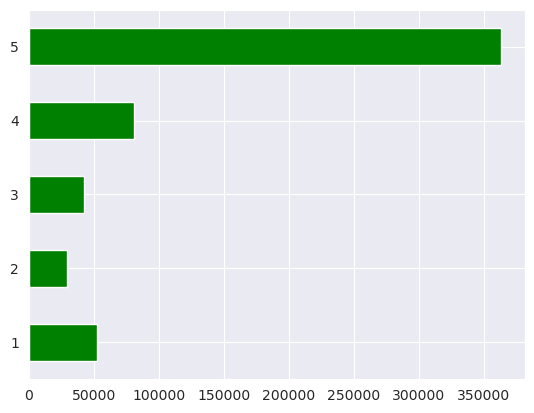

In [27]:
data.Score.value_counts().sort_index().plot(kind = 'barh',color = 'green')
plt.show()

Most of the reviews are rated 5 so our dataset will be biased towards positive reviews of product this might mean that certain products are really good.

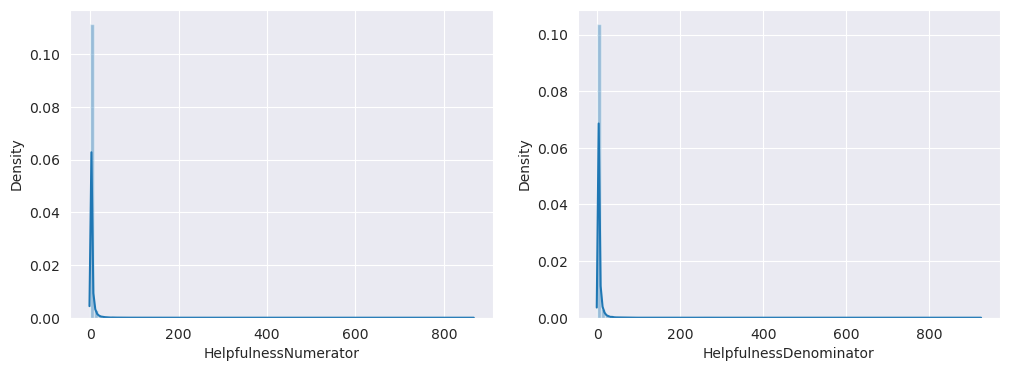

In [65]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
sns.distplot(data.HelpfulnessNumerator,bins=100,kde=True,ax=axs[0])
sns.distplot(data.HelpfulnessDenominator,bins=100,kde=True,ax=axs[1])
plt.show()

Helpfulness numerator and denominator data are highly skewed towards right most of the daa lies around 0

## Choosing the Algorithm for the Project

The data is not already labeled with sentiments so here we can do two different things.
- Go through all the reviews and label them manually
- we can use pretrained models/transformers to classify the reviews.

### Vader Sentiment Model

In [22]:
!pip install vaderSentiment
!pip install transformers
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 619.2 kB/s eta 0:00:00a 0:00:01
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Vader sentiment analyzer is a pretrained model that performs really good on social media conversations, it has object SentimentIntensityAnalyzer which produces polarity scores for neg, neu, pos sentiments and a compound score that ranges from -1 to 1, -1 being negative and 1 being positive.

In [23]:
sen_analyzer = SentimentIntensityAnalyzer()
result = sen_analyzer.polarity_scores(" I love Tea")

Here we will be taking the compound score for our sentiment analysis and for our example sequence " I love tea" it produces compound score of 0.63 which means the sentiment is positive of the sequence.

In [24]:
result['compound']

0.6369

In [25]:
def sentiment_check(row):
  result = sen_analyzer.polarity_scores(row)

  if result['compound'] >= 0.5:
    return "Positive"
  elif result['compound'] <= -0.5:
    return "Negative"
  else :
    return "Neutral"

In [26]:
data['Vader_sentiment'] = data.Text.progress_apply(sentiment_check)

  0%|          | 0/568411 [00:00<?, ?it/s]

In [28]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hugging_face_Sentiments,Vader_sentiment
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,Positive
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Neutral,Negative
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,Positive
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Positive,Neutral
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,Positive


### Transformer bertweet-base-sentiment-analysis from huggingface 

In [11]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification
os.environ["HF_ENDPOINT"] = "https://huggingface.co"

# Getting the tokenizer
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

# Getting the model
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/338 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/949 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [12]:
encoded_text = tokenizer('I am not sad because I ate gajar ka halva', return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,     8,   155,    46,   573,   153,     8,   760,  2551, 12145,
          1185,  6700,  3715,     2]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Here the encoded_text is a dictonary which takes in a sequence and converts it inot tensors that are required by the model to predict the sentiment.
- Input_ids are the numerical indices of the tokens in the sequence.
- token_type_ids differentiates the token being from one sequence or many
-attention_mask defines which of the tokens should be paid attention to for classification of the text , for eg if the tokenised tensor is padded than the padding won't have attention of the model

In [13]:
out = model(**encoded_text)
out

SequenceClassifierOutput(loss=None, logits=tensor([[-2.9146,  0.8716,  2.0700]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Output of the model is a tensor with values for different classes neg,neu,pos which can be collected using argmax function

In [14]:
out.logits.argmax().item()

2

In [31]:
labels = model.config.id2label
labels[2]

'POS'

The Model has predicted our example sequence to be positive. Which is not true as I did not really ate any halva. ;)

In [16]:
def hugging_face_analyzer(row):
  encoded_text = tokenizer(row, return_tensors='pt',max_length = 128,truncation=True).to('cuda')
  out = model(**encoded_text)
  max_index = out.logits.argmax().item()
  sentiment = labels[max_index]

  if sentiment == 'POS':
    return "Positive"
  elif sentiment == 'NEG':
    return "Negative"
  elif  sentiment == 'NEU':
    return "Neutral"

Below we are initializing the model in GPU so that we can get the inferences faster as compared to on CPU

In [19]:
import torch
from torch import nn

device = torch.device('cuda')
device_staging = 'cuda:0'
#model = nn.DataParallel(model, device_ids=[0])
model.to(device_staging)

DataParallel(
  (module): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(64001, 768, padding_idx=1)
        (position_embeddings): Embedding(130, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Linear(i

In [20]:
data['Hugging_face_Sentiments'] = data.Text.progress_apply(hugging_face_analyzer)

  0%|          | 0/568411 [00:00<?, ?it/s]

In [32]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hugging_face_Sentiments,Vader_sentiment
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,Positive
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Neutral,Negative
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,Positive
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Positive,Neutral
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,Positive


## Inferences from the Same

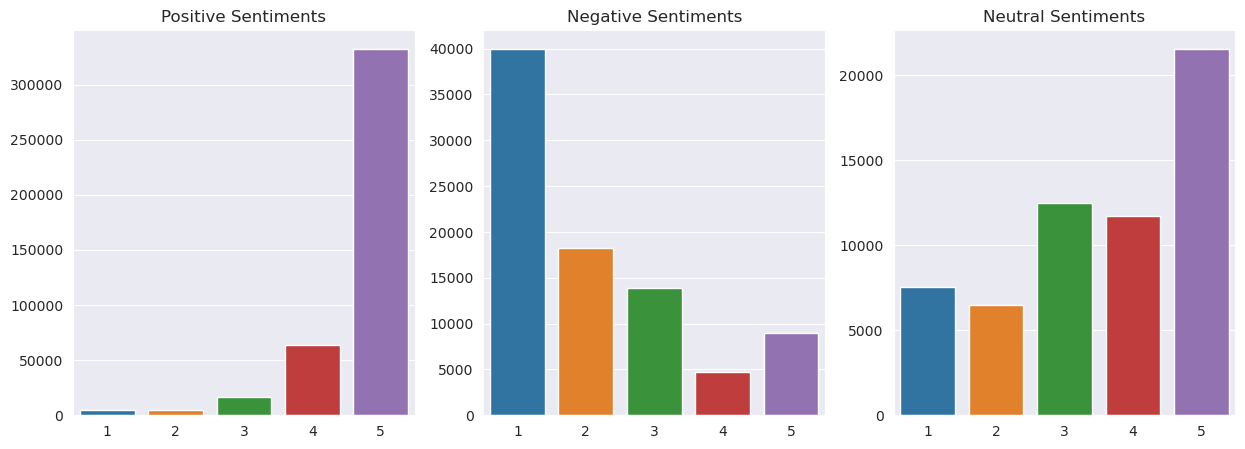

In [102]:
positive_hugging = data.loc[data.Hugging_face_Sentiments == 'Positive']['Score'].value_counts()
negative_hugging = data.loc[data.Hugging_face_Sentiments == 'Negative']['Score'].value_counts()
neutral_hugging = data.loc[data.Hugging_face_Sentiments == 'Neutral']['Score'].value_counts()


fig,axs = plt.subplots(1,3,figsize = (15,5))

sns.barplot(y = positive_hugging.values,x = positive_hugging.index,ax = axs[0])
axs[0].set_title('Positive Sentiments')
sns.barplot(y = negative_hugging.values,x = negative_hugging.index,ax = axs[1])
axs[1].set_title("Negative Sentiments")
sns.barplot(y = neutral_hugging.values,x = neutral_hugging.index,ax = axs[2])
axs[2].set_title('Neutral Sentiments')

plt.show()

As expected the Positive Sentiments have most of the 5 rated reviews and negative reviews have 1 rated reviews.

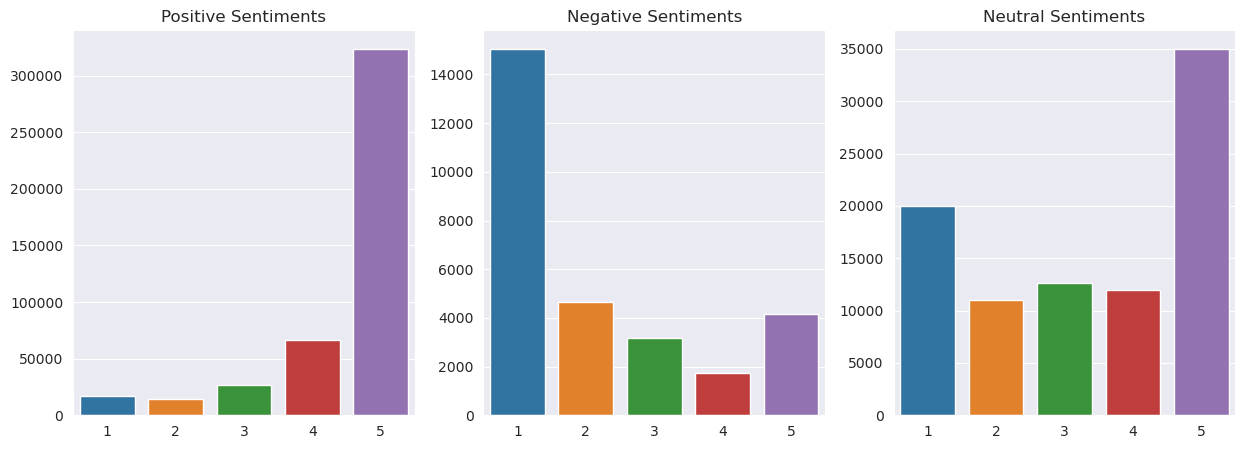

In [105]:
positive_vader = data.loc[data.Vader_sentiment == 'Positive']['Score'].value_counts()
negative_vader = data.loc[data.Vader_sentiment == 'Negative']['Score'].value_counts()
neutral_vader = data.loc[data.Vader_sentiment == 'Neutral']['Score'].value_counts()


fig,axs = plt.subplots(1,3,figsize = (15,5))

sns.barplot(y = positive_vader.values,x = positive_vader.index,ax = axs[0])
axs[0].set_title('Positive Sentiments')
sns.barplot(y = negative_vader.values,x = negative_vader.index,ax = axs[1])
axs[1].set_title("Negative Sentiments")
sns.barplot(y = neutral_vader.values,x = neutral_vader.index,ax = axs[2])
axs[2].set_title('Neutral Sentiments')
plt.show()

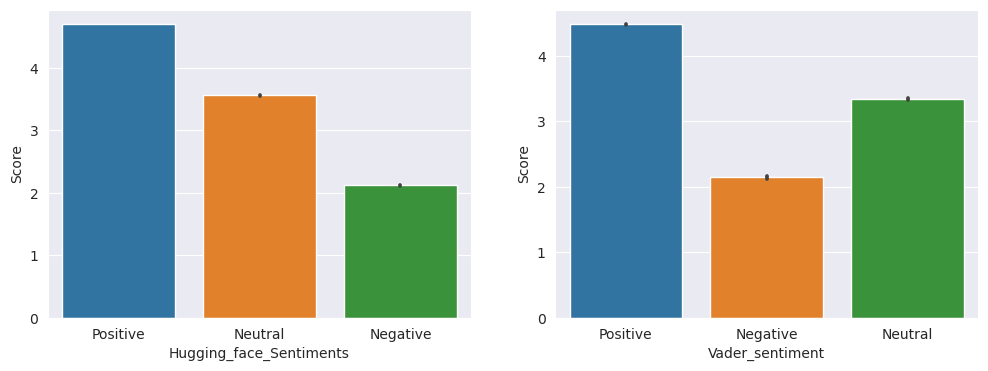

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data = data,x = 'Hugging_face_Sentiments',y = 'Score',ax = axs[0])
sns.barplot(x = data.Vader_sentiment,y = data.Score,ax = axs[1])
plt.show()

## Future Possibilities of the Project

- Model can be deployed on cloud to predict the realtime sentiments of the future reviews.

### Refrences

- https://pytorch.org/tutorials/recipes/recipes/tuning_guide.html
- https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671
- https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis